<a href="https://colab.research.google.com/github/sawubona-repo/KETE-HS23-WORK/blob/main/LB2-CognitiveComputing/DEMO_First_Deep_Learning_Project_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEMO: Your First Deep Learning Project in Python with Keras Step-by-Step  

*Keras* is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

It is part of the *TensorFlow* library and allows you to define and train neural network models in just a few lines of code.

In this tutorial, you will discover how to create your first deep learning neural network model in Python using Keras.

Kick-start your project with my new book Deep Learning With Python, including step-by-step tutorials and the Python source code files for all examples.


---
Source:
+ [Machine Learning Mastery](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

  + Author: Jason Brownlee  
  +  History: Last Updated on August 16, 2022

+ [Case Study: Predicting the Onset of Diabetes Within Five Years](https://machinelearningmastery.com/case-study-predicting-the-onset-of-diabetes-within-five-years-part-1-of-3/)  
 + Author: Igor Shvartser
 + History: 2019

---
Data:
+ [768 Females of **Pima Indian Heritage**](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)

We can learn from the data found on UCI Machine Learning Repository which contains data on female patients at least 21 years old of Pima Indian heritage. We have *768 instances* and the following *8 attributes*:

  + Number of times pregnant (preg)
  + Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas)
  + Diastolic blood pressure in mm Hg (pres)
  + Triceps skin fold thickness in mm (skin)
  + 2-Hour serum insulin in mu U/ml (insu)
  + Body mass index measured as weight in kg/(height in m)^2 (mass)
  + Diabetes pedigree function (pedi)
  + Age in years (age)

The population for this study was the Pima Indian population near Phoenix, Arizona. The population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes.

For the purposes of this dataset, diabetes was diagnosed according to World Health Organization Criteria, which stated that if the 2 hour post-load glucose was at least 200 mg/dl at any survey exam or if the Indian Health Service Hospital serving the community found a glucose concentration of at least 200 mg/dl during the course of routine medical care.  

Given the medical data we can gather about people, we should be able to make better predictions on how likely a person is to suffer the onset of diabetes, and therefore act appropriately to help.   

---  
---  
History:
+ 08.08.2023 v1 dbe - adapted for KETE HS23  

---

In [28]:
# setup environment, load libraries
from numpy import loadtxt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
# load the dataset from github
dataset = loadtxt("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", delimiter=',')

In [30]:
dataset[1:3]

array([[  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ,   0.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,
         32.   ,   1.   ]])

In [31]:
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [32]:
import tensorflow as tf

In [33]:
# DEFINE the keras model

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, input_shape=(8,), activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                108       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# COMPILE the keras model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'
])

In [36]:
# TRAIN (fit) the keras model on the dataset
history = model.fit(X, y,
                    epochs=50,
                    batch_size=10,
                    verbose=1)

Epoch 1/50
77/77 [==============================] - 1s 2ms/step - loss: 10.8286 - accuracy: 0.6328
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 2.4378 - accuracy: 0.5872
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 1.2786 - accuracy: 0.5664
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 1.0307 - accuracy: 0.5924
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 0.8994 - accuracy: 0.6263
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 0.7643 - accuracy: 0.6432
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 0.7324 - accuracy: 0.6615
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 0.7231 - accuracy: 0.6523
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6758
Epoch 10/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6706
Epoch 11/50
77/77 

In [37]:
# EVALUATE the keras model
_, accuracy = model.evaluate(X, y)

print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.7474
Accuracy: 74.74


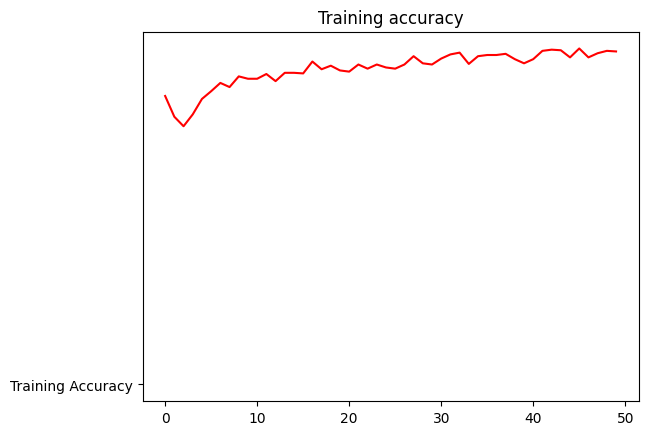

In [38]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
loss=history.history['loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.title('Training accuracy')
plt.show()
print("")

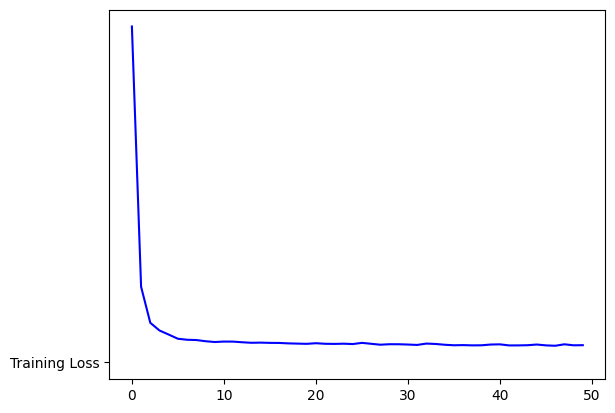

In [39]:
#------------------------------------------------
# Plot training loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'b', "Training Loss")
plt.show()